In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import stat
from statsmodels.tsa.stattools import coint, adfuller

In [17]:
day_0 = pd.read_csv("prices_round_3_day_0.csv", sep=";")
day_1 = pd.read_csv("prices_round_3_day_1.csv", sep=";")
day_2 = pd.read_csv("prices_round_3_day_2.csv", sep=";")

all_days = pd.concat([day_0,day_1,day_2], ignore_index=True)
print(all_days.head())

   day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0    0          0     CHOCOLATE         7999           111          NaN   
1    0          0  STRAWBERRIES         3999           210          NaN   
2    0          0         ROSES        14999            72          NaN   
3    0          0   GIFT_BASKET        71348            19      71347.0   
4    0        100   GIFT_BASKET        71344             1      71343.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           NaN          NaN           NaN         8001           111   
1           NaN          NaN           NaN         4001           210   
2           NaN          NaN           NaN        15001            72   
3          24.0          NaN           NaN        71362            19   
4          12.0      71342.0          20.0        71355             1   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          Na

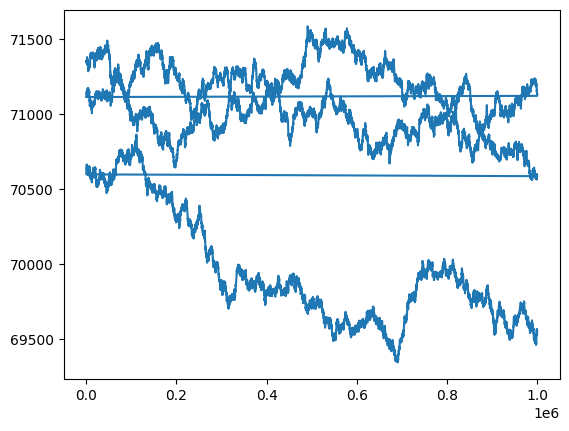

    day  timestamp      product  bid_price_1  bid_volume_1  bid_price_2  \
3     0          0  GIFT_BASKET        71348            19      71347.0   
4     0        100  GIFT_BASKET        71344             1      71343.0   
9     0        200  GIFT_BASKET        71344             4      71339.0   
14    0        300  GIFT_BASKET        71345             2      71343.0   
19    0        400  GIFT_BASKET        71336             2      71335.0   

    bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
3           24.0          NaN           NaN        71362            19   
4           12.0      71342.0          20.0        71355             1   
9            1.0      71338.0          14.0        71350             1   
14          11.0      71342.0          29.0        71356             2   
19          13.0      71334.0          25.0        71347             2   

    ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
3       71363.0          24.0    

In [18]:
gift_basket_alldays = all_days[all_days['product'] == "GIFT_BASKET"]
plt.plot(gift_basket_alldays['timestamp'],gift_basket_alldays['mid_price'])
plt.show()
print(gift_basket_alldays.head())
print(gift_basket_alldays.shape)

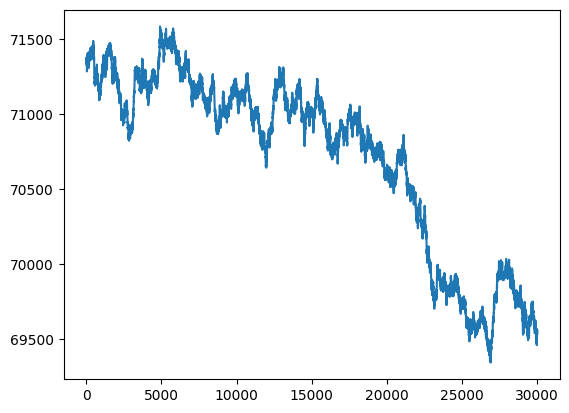

(30000, 18)


In [19]:
gift_basket_alldays.reset_index(inplace=True)
plt.plot(gift_basket_alldays['mid_price'])
plt.show()
print(gift_basket_alldays.shape)

In [20]:
strawberry_all_days = all_days[all_days['product'] == "STRAWBERRIES"]
chocolate_all_days = all_days[all_days['product'] == "CHOCOLATE"]
roses_all_days = all_days[all_days['product'] == "ROSES"]
print(strawberry_all_days.shape)
print(chocolate_all_days.shape)
print(roses_all_days.shape)

(30000, 17)
(30000, 17)
(30000, 17)


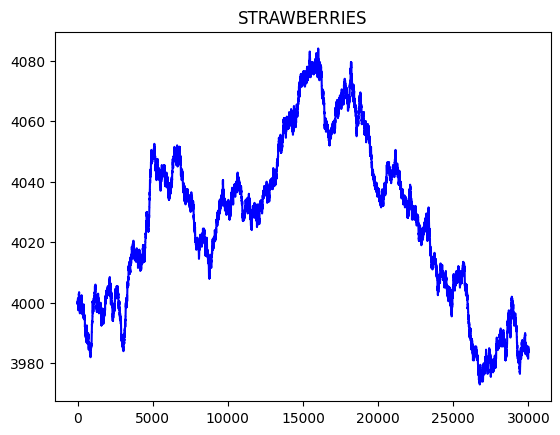

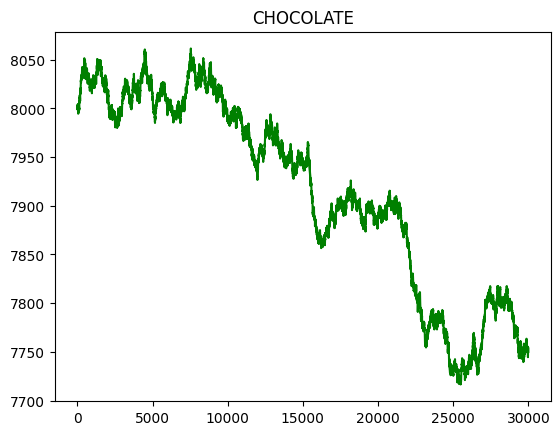

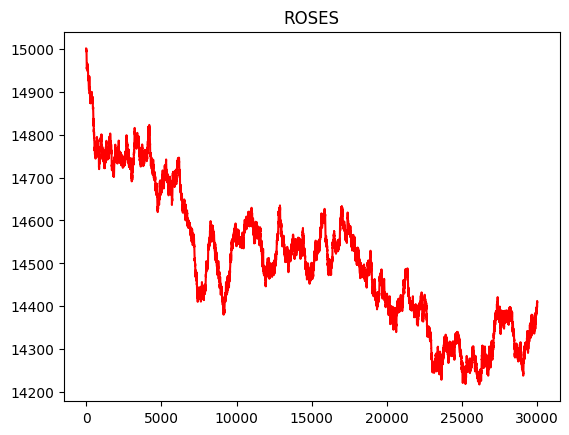

In [21]:
strawberry_all_days.reset_index(inplace=True)
chocolate_all_days.reset_index(inplace=True)
roses_all_days.reset_index(inplace=True)

plt.plot(strawberry_all_days['mid_price'], color="blue")
plt.title("STRAWBERRIES")
plt.show()
plt.plot(chocolate_all_days['mid_price'], color="green")
plt.title("CHOCOLATE")
plt.show()
plt.plot(roses_all_days['mid_price'], color="red")
plt.title("ROSES")
plt.show()

### Stationarity Results
- 
### Cointegration Results

In [22]:
# check if the basket price is literally just equal to 4 * Chocolate + 6 * Strawberries + 1 * Rose at that time point. 
mid_price_data = pd.DataFrame({
    "STRAWBERRIES": strawberry_all_days['mid_price'],
    "CHOCOLATE": chocolate_all_days['mid_price'],
    "ROSES": roses_all_days['mid_price'],
    "GIFT_BASKET": gift_basket_alldays['mid_price']
}, index=strawberry_all_days.index)
print(mid_price_data.head())
print(mid_price_data.shape)

   STRAWBERRIES  CHOCOLATE    ROSES  GIFT_BASKET
0        4000.0     8000.0  15000.0      71355.0
1        3999.5     8001.5  15000.0      71349.5
2        3999.5     8001.0  15000.5      71347.0
3        3999.5     8002.5  15000.0      71350.5
4        3999.5     8002.0  14997.5      71341.5
(30000, 4)


In [23]:
mid_price_data['SUM_OF_PARTS'] = 4 * mid_price_data['CHOCOLATE'] + 6 * mid_price_data['STRAWBERRIES'] + mid_price_data['ROSES']
print(mid_price_data.head())

   STRAWBERRIES  CHOCOLATE    ROSES  GIFT_BASKET  SUM_OF_PARTS
0        4000.0     8000.0  15000.0      71355.0       71000.0
1        3999.5     8001.5  15000.0      71349.5       71003.0
2        3999.5     8001.0  15000.5      71347.0       71001.5
3        3999.5     8002.5  15000.0      71350.5       71007.0
4        3999.5     8002.0  14997.5      71341.5       71002.5


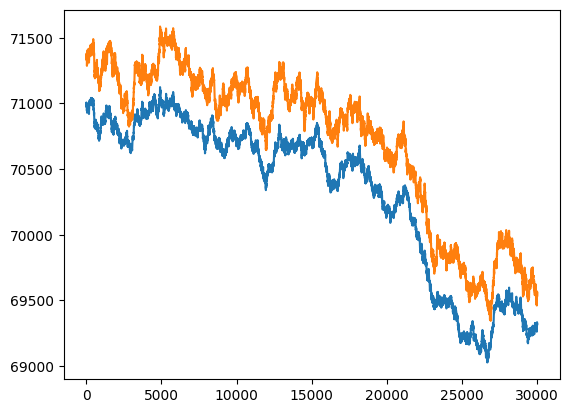

In [24]:
plt.plot(mid_price_data['SUM_OF_PARTS'])
plt.plot(mid_price_data['GIFT_BASKET'])
plt.show()

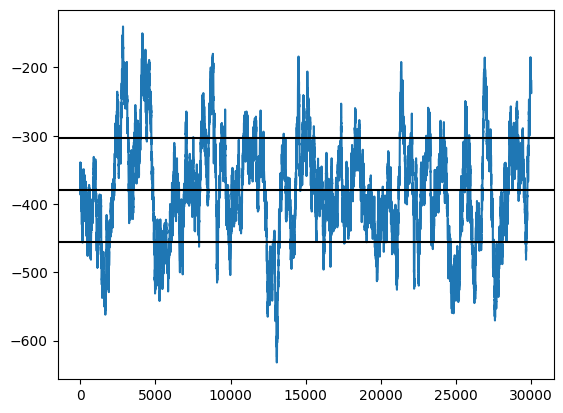

In [25]:
gift_basket_diff = mid_price_data['SUM_OF_PARTS'] - mid_price_data['GIFT_BASKET']
st_dev = np.std(gift_basket_diff)
mean = np.mean(gift_basket_diff)
upper_bound = np.mean(gift_basket_diff) + st_dev
lower_bound = np.mean(gift_basket_diff) - st_dev
mean_normalized_gift_basket_diff = gift_basket_diff - mean
plt.plot(gift_basket_diff)
plt.axhline(mean, color = "black")
plt.axhline(upper_bound, color="black")
plt.axhline(lower_bound, color="black")
plt.show()

In [26]:
print(adfuller(gift_basket_diff)) # stationary
print(adfuller(mid_price_data['GIFT_BASKET'])) # not stationary
print(coint(gift_basket_diff, gift_basket_alldays['mid_price'])) # cointegrated

(-6.446360786110669, 1.5623227975528457e-08, 1, 29998, {'1%': -3.430568009855954, '5%': -2.8616363544632057, '10%': -2.566821286540422}, 194520.08911243273)
(-0.59067013344935, 0.8730762888106696, 1, 29998, {'1%': -3.430568009855954, '5%': -2.8616363544632057, '10%': -2.566821286540422}, 209836.12426855078)
(-6.425710816701556, 1.8565244753525418e-07, array([-3.89680511, -3.33633368, -3.04459138]))


In [27]:
def calculate_linear_reg(df):
    """Runs a least squares linear regression through the price data in the self.rolling_windows timeframe"""
    y_vals = np.array(df)
    x_vals = np.arange(0,len(df))
    x_mean = np.mean(x_vals)
    y_mean = np.mean(y_vals)
    slope = np.sum((x_vals - x_mean) * (y_vals - y_mean)) / np.sum((x_vals - x_mean)**2)
    b = y_mean - slope * x_mean

    return slope, b

In [29]:
# predict the price of the gift basket using linear regression based on past 30 days
# Assuming gift_basket_alldays is your DataFrame and 'mid_price' is your column of interest
# Create the rolling window
rolling_windows = gift_basket_alldays['mid_price'].rolling(window=30)
print(rolling_windows)

Rolling [window=30,center=False,axis=0,method=single]


In [34]:
# Define a function to calculate the slope of linear regression
def linear_regression_slope(series):
    # y = mid_price values
    y = series.values
    # x = days, assuming each row corresponds to a day and is equally spaced
    x = np.arange(len(series))
    # Add a column of ones to include an intercept in the model
    A = np.vstack([x, np.ones(len(x))]).T
    # Linear least squares fitting (y = mx + c)
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m * (len(series) - 1) + c

# Apply the function to calculate the slope for each rolling window
gift_basket_alldays['Linear_Reg_Px'] = rolling_windows.apply(linear_regression_slope)
print(gift_basket_alldays[30:60])

    index  day  timestamp      product  bid_price_1  bid_volume_1  \
30    123    0       3000  GIFT_BASKET        71330             2   
31    125    0       3100  GIFT_BASKET        71332             2   
32    128    0       3200  GIFT_BASKET        71330             2   
33    134    0       3300  GIFT_BASKET        71327             2   
34    139    0       3400  GIFT_BASKET        71320             2   
35    141    0       3500  GIFT_BASKET        71329             2   
36    144    0       3600  GIFT_BASKET        71319            16   
37    151    0       3700  GIFT_BASKET        71325             2   
38    155    0       3800  GIFT_BASKET        71339             5   
39    158    0       3900  GIFT_BASKET        71333             6   
40    160    0       4000  GIFT_BASKET        71327             2   
41    167    0       4100  GIFT_BASKET        71311             1   
42    171    0       4200  GIFT_BASKET        71298             2   
43    174    0       4300  GIFT_BA

C:\Users\Acer\AppData\Local\Temp\ipykernel_22256\560878573.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gift_basket_alldays['Linear_Reg_Px'] = rolling_windows.apply(linear_regression_slope)


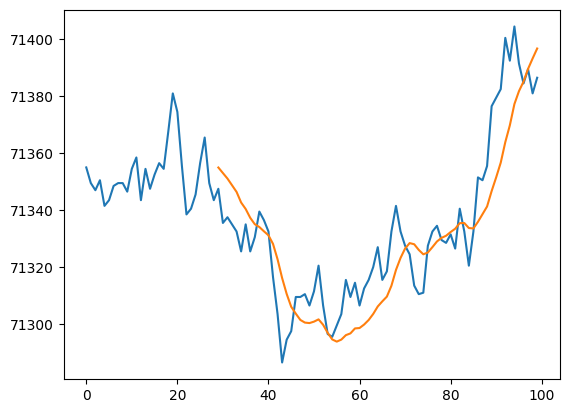

In [39]:
plt.plot(gift_basket_alldays['mid_price'][:100])
plt.plot(gift_basket_alldays['Linear_Reg_Px'][:100])

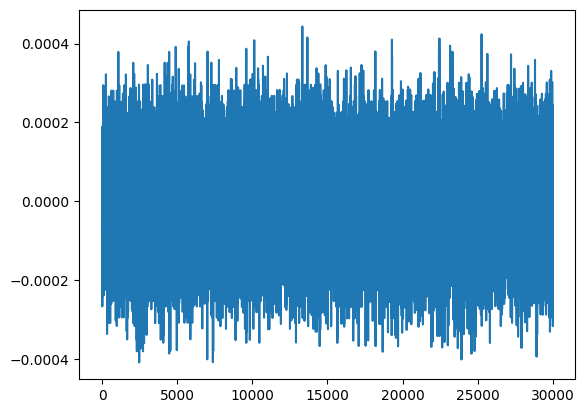

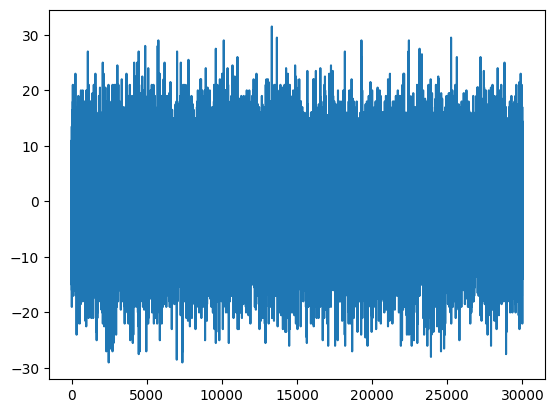

In [43]:
plt.plot(gift_basket_alldays['mid_price'].pct_change())
plt.show()
plt.plot(gift_basket_alldays['mid_price'].diff())
plt.show()
        

- `CHOCOLATE`: 250
- `STRAWBERRIES`: 350
- `ROSES`: 60
- `GIFT_BASKET`: 60

The `GIFT_BASKET` is now available as a tradable good. This lovely basket contains three things: 

1. Four `CHOCOLATE` bars
2. Six `STRAWBERRIES`
3. A single `ROSES`